In [1]:
import sys
import os
import json

os.chdir('../')
sys.path.insert(0, 'src')

from etl import get_data
from features import get_features, clean_features
from stat_model import ttest

## Problem statement
In the following notebook we are going to explore the question: Are first-born babies more likely to arrive late or early?

Our null hypothesis therfore is: first borns are likely to arrive at the same time as all newborn babies.

### Loading Data

In [2]:
with open('config/data_params.json') as fh:
    data_cfg = json.load(fh)
    # make the data target
datafile = get_data(**data_cfg)

with open('config/features_params.json') as fh:
    feats_cfg = json.load(fh)
data = get_features(datafile, feats_cfg)

In [3]:
data.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,3316.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,3925.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,1433.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,1783.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,1833.0,12999.542264


### Cleaning Data

Let's check the distribution of the weights field

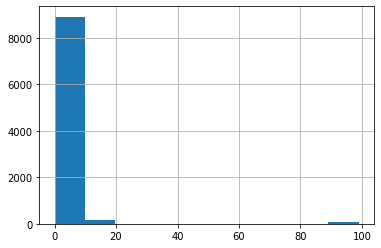

In [33]:
data['weight'] = data['birthwgt_lb'] + data['birthwgt_oz']/16
data['birthwgt_lb'].hist()

The distribution does not look right because the weights of the new born kids cannot be more than 20 lbs.

In [18]:
data_20_gr_weight = data[data['birthwgt_lb']>20]

In [19]:
data_20_gr_weight.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt,weight
126,145,1.0,1.0,99.0,NaN,39,1,2.0,2275.0,6131.419855,NaN
127,145,1.0,1.0,99.0,NaN,39,1,3.0,2875.0,6131.419855,NaN
129,145,1.0,2.0,99.0,NaN,39,1,4.0,3441.0,6131.419855,NaN
233,252,1.0,1.0,99.0,NaN,40,1,1.0,2658.0,10810.594955,NaN
234,252,1.0,2.0,99.0,NaN,40,1,2.0,2800.0,10810.594955,NaN


The weights greater than 20lbs refer to those records where the weight data is not available

Distribution of weights after removing the weights greater than 20. The new distribution more closely resembles the gaussian distribution.

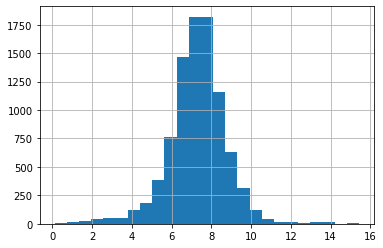

In [21]:
data[data['birthwgt_lb']<20]['weight'].hist(bins=25)

While cleaning the data we also remove the rows where the outcome is not equal to 1. These rows refer to dead newborns of different kinds.

In [22]:
cleaned_data = clean_features(data)

### EDA

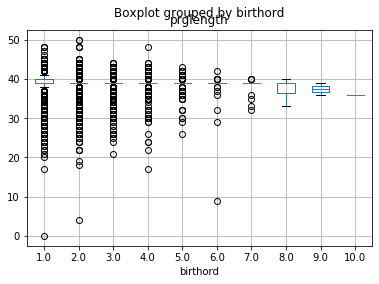

In [24]:
cleaned_data.boxplot(column='prglength',by='birthord')

From the boxplot we don't get much insight because the means of first borns and others is almost the same. The variance for first borns is greater than others, that can be attributed to the fact that more number of records exist for the first borns. 

## Statistical Test

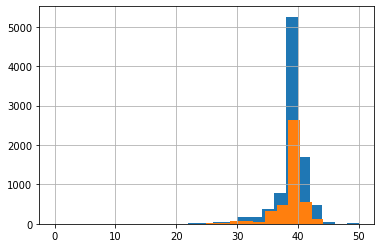

In [30]:
cleaned_data['prglength'].hist(bins=25);
cleaned_data[cleaned_data['birthord']==1]['prglength'].hist(bins=25);

In [31]:
from scipy.stats import ttest_ind
df1 = cleaned_data['prglength']
df2 = cleaned_data[cleaned_data['birthord']==1]['prglength']
ttest_ind(df1, df2)

Ttest_indResult(statistic=-0.7706942953177321, pvalue=0.4409016793979109)

p-value is > 0.05 hence we fail to reject the null hypothesis